# Subexponential and power laws

## Subexponential distributions

A subexponential distribution exists between a thin-tailed and a fat-tailed distribution. Such a distribution begins to show proper fat-tailed behaviour and has the following limit definition:

$\lim_{x\to\infty} \frac{1 - F{*^2}(x)}{1 - F(x)} = 2$,

where $F(x) = P(X < x)$ is the cumulative density function giving us the probability the random variable that we sample is less than $x$, and $F{*^2} = F * F$ is the [convolution](https://en.wikipedia.org/wiki/Convolution_of_probability_distributions) of F(x) with itself. 

The survival function $S(x) = 1 - F(x) = P(X > x)$, the probability the random variable that we sample is greater than $x$. In a similar way, $1 - F{*^2}(x)$ is the probability the we sample two independent random variables and both are greater than $x$.

Thus, we now interpret the limit as:

$\frac{\text{probability sample from} \ F(x) \ \text{twice and both times exceed} \ x}{\text{probability that either exceed} \ x} = 2$
    
As $x$ becomes bigger. Now, as $x$ becomes bigger, the more we are in the tails and only in the tails does the limit hold. The limit may be surprising as we may expect that when we sample in the tails twice, the probability that we exceed $x$ is more than double than just sampling once.
    
However, the variable from sampling once may put us close to the variables from sampling twice as large values are "in a probabilistic sense close together" in the tails of subexponential distributions.

In [2]:
import matplotlib.pyplot as plt
import matplotlib.pylab  as pylab  

import numpy as np
import scipy.stats

import random

from mpl_toolkits.mplot3d import Axes3D

params = {
    "legend.fontsize" : "xx-large",
    "axes.labelsize"  : "xx-large",
    "axes.titlesize"  : "xx-large",
    "xtick.labelsize" : "xx-large",
    "ytick.labelsize" : "xx-large"
}

pylab.rcParams.update(params)

## Inventing a subexponential distribution

Typically, distributions are either thin-tailed or fat-tailed whereas a subexponential distribution exists in the middle and is less common in practice. As it is less common, we choose to invent a subexponential distribution to explore fat-tailed behaviour.

Our invented subexponential distribution has probability density function

$P(x) = \frac{\operatorname{sech}^2(x)}{2}$.

We compare this distribution against a normal distribution that has the same variance as our invented distribution. This variance is obtained by computing the second moment of the invented distribution, i.e.

$\int_{-\infty}^{\infty} x^2 \frac{\operatorname{sech}^2(x)}{2} \, dx = \frac{\pi^2}{12}$.

### "Folding" the distributions

We would like to consider only the right tails of our distributions and hence assume $P(x) = 0 : x \lt 0$, which "folds" the distrbutions along the y-axis.

The "folding" means the distributions integrate to 0.5 (half the original value) but to be valid probability distributions, they must integrate to 1 (area underneath the curves must be 1). To ensure they integrate to 1, we multiply them by 2.

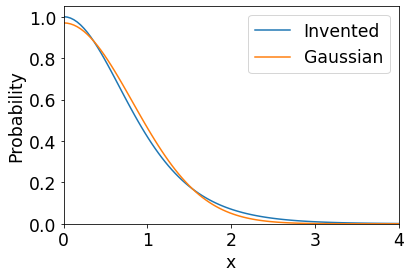

In [3]:
class PDFGaussianFolded(
        scipy.stats.rv_continuous
    ):
        def _pdf(
                self,
                x
            ):
                # have a variance equal to that of the invented distribution
                sigma = np.pi * np.pi / 12
                
                return 2 / sigma / np.sqrt(2 * np.pi) * np.exp( -0.5 * (x / sigma) * (x / sigma) )
            
class PDFInventedFolded(
        scipy.stats.rv_continuous
    ):
        def _pdf(
                self,
                x
            ):
                return ( 1 / np.cosh(x) ) * ( 1 / np.cosh(x) )
            
def compare_invented_and_gaussian():
    x = np.linspace(0, 4, 100)
    
    P_invented = PDFInventedFolded(momtype=0, a=0).pdf(x)
    P_Gauss    = PDFGaussianFolded(momtype=0, a=0).pdf(x)
    
    plt.plot(x, P_invented, label="Invented")
    plt.plot(x, P_Gauss,    label="Gaussian")
    plt.ylabel("Probability")
    plt.xlabel('x')
    plt.legend()
    plt.ylim(0, 1.05)
    plt.xlim(0, 4)

compare_invented_and_gaussian()

## Intuition for fat-tailedness

The function `survival_invented_vs_gaussian` will show the intuition for fat-tailedness, which is the shallower the slope of the surivival function $S(x)$ of a distribution in a log-log plot, the more fat-tailed it is.

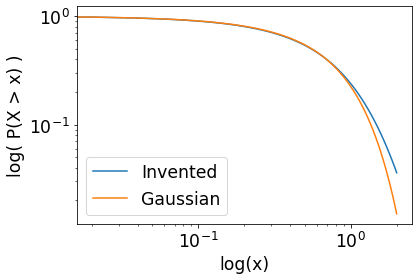

In [4]:
def survival_invented_vs_gaussian():
    x = np.linspace(0, 2, 100)
    
    Fbar_invented = PDFInventedFolded(momtype=0, a=0).sf(x)
    Fbar_Gauss    = PDFGaussianFolded(momtype=0, a=0).sf(x)
    
    plt.plot(x, Fbar_invented, label="Invented")
    plt.plot(x, Fbar_Gauss,    label="Gaussian")
    plt.ylabel("log( P(X > x) )")
    plt.xlabel("log(x)")
    plt.yscale("log")
    plt.xscale("log")
    plt.legend()
    
survival_invented_vs_gaussian()

## Power laws

Consider the probability ratio

$\frac{P_{X>nK}}{P_{X>K}}$,

where $n$ is the number of times we sample from the distribution and $K$ is "how far into the tail" we are, assuming we are only considering a right-tailed distribution.

A power law distribution is such that the ratio depends only on $n$ and not $K$. That is, the ratio depends only on how many times we sample, and not so much on how far in the tail we are.

From this, the survival function $S(x)$ of a power law can be formally defined as

$S(x) = P(X > x) = L(x)x^{-\alpha}$,

where $L(x)$ becomes constant for large $x$, meaning in the tails $L(x)$ has no contribution other than scaling $x^{-\alpha}$.

If we were to plot the survival functions of power laws in a log-log plot, we should get straight slopes for large $x$. Such slopes will be shown by the function `survival_power_laws`. The shallower the slope the smaller must be the exponent $\alpha$, and thus the more severe the power law.

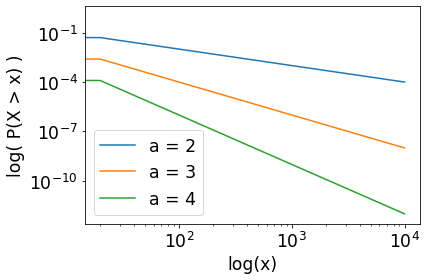

In [5]:
def survival_power_laws():
    xmin = 0
    xmax = 10_000
    
    x = np.linspace(xmin, xmax, 500)
    
    Fbar_pareto_2 = scipy.stats.pareto.sf(x, b=2-1)
    Fbar_pareto_3 = scipy.stats.pareto.sf(x, b=3-1)
    Fbar_pareto_4 = scipy.stats.pareto.sf(x, b=4-1)
    
    plt.plot(x, Fbar_pareto_2, label="a = 2")
    plt.plot(x, Fbar_pareto_3, label="a = 3")
    plt.plot(x, Fbar_pareto_4, label="a = 4")
    plt.ylabel("log( P(X > x) )")
    plt.xlabel("log(x)")
    plt.yscale("log")
    plt.xscale("log")
    plt.legend()
    
survival_power_laws()

## Some properties of power laws

What happens if we mix power laws? Such mixing could happen if for example we are sampling random variables from multiple power law distributions with survival function $S(x) \propto x^{-\alpha}$. As $x$ becomes large, the contribution from the power law with the smallest $\alpha$ swamps the rest, as shown in the function `mixing_tails`.

Thus, if we mix power laws of differing severity from most to least, we simply get back a power law that is the most severe.

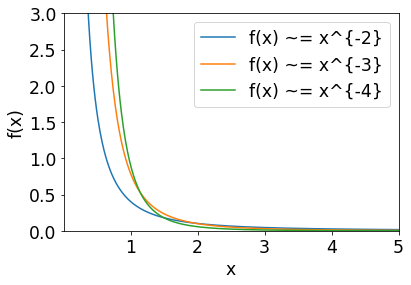

In [47]:
"""
property 2 understand

"""
def mixing_tails():
    xmin = 0.001
    xmax = 5
    
    x = np.linspace(xmin, xmax, 500)
    
    C1, C2, C3 = [ random.random() for x in range(3) ]
    
    X2 = C1 * x ** -2
    X3 = C2 * x ** -3
    X4 = C3 * x ** -4
    
    plt.plot(x, X2, label="f(x) ~= x^{-2}")
    plt.plot(x, X3, label="f(x) ~= x^{-3}")
    plt.plot(x, X4, label="f(x) ~= x^{-4}")
    plt.ylabel("f(x)")
    plt.xlabel("x")
    plt.xlim(xmin, xmax)
    plt.ylim(0, 3)
    plt.legend()
    
mixing_tails()